In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/train.csv')
df.head()

id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
0   0    1    1017.4     21.2         20.6     19.9      19.4      87.0   
1   1    2    1019.5     16.2         16.9     15.8      15.4      95.0   
2   2    3    1024.1     19.4         16.1     14.6       9.3      75.0   
3   3    4    1013.4     18.1         17.8     16.9      16.8      95.0   
4   4    5    1021.8     21.3         18.4     15.2       9.6      52.0   

   cloud  sunshine  winddirection  windspeed  rainfall  
0   88.0       1.1           60.0       17.2         1  
1   91.0       0.0           50.0       21.9         1  
2   47.0       8.3           70.0       18.1         1  
3   95.0       0.0           60.0       35.6         1  
4   45.0       3.6           40.0       24.8         0

In [4]:
df.describe()

id          day     pressure      maxtemp  temparature  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean   1094.500000   179.948402  1013.602146    26.365799    23.953059   
std     632.342866   105.203592     5.655366     5.654330     5.222410   
min       0.000000     1.000000   999.000000    10.400000     7.400000   
25%     547.250000    89.000000  1008.600000    21.300000    19.300000   
50%    1094.500000   178.500000  1013.000000    27.800000    25.500000   
75%    1641.750000   270.000000  1017.775000    31.200000    28.400000   
max    2189.000000   365.000000  1034.600000    36.000000    31.500000   

           mintemp     dewpoint     humidity        cloud     sunshine  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean     22.170091    20.454566    82.036530    75.721918     3.744429   
std       5.059120     5.288406     7.800654    18.026498     3.626327   
min       4.000000    -0.300000    39.000000     2.000000     0.000000   
25%      17.700000    16.800000    77.000000    69.000000     0.400000   
50%      23.850000    22.150000    82.000000    83.000000     2.400000   
75%      26.400000    25.000000    88.000000    88.000000     6.800000   
max      29.800000    26.700000    98.000000   100.000000    12.100000   

       winddirection    windspeed     rainfall  
count    2190.000000  2190.000000  2190.000000  
mean      104.863151    21.804703     0.753425  
std        80.002416     9.898659     0.431116  
min        10.000000     4.400000     0.000000  
25%        40.000000    14.125000     1.000000  
50%        70.000000    20.500000     1.000000  
75%       200.000000    27.900000     1.000000  
max       300.000000    59.500000     1.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB


In [11]:
numeric_cols = df.select_dtypes(include='number')
numeric_cols = numeric_cols.drop('id', axis=1).columns
numeric_cols

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed',
       'rainfall'],
      dtype='object')

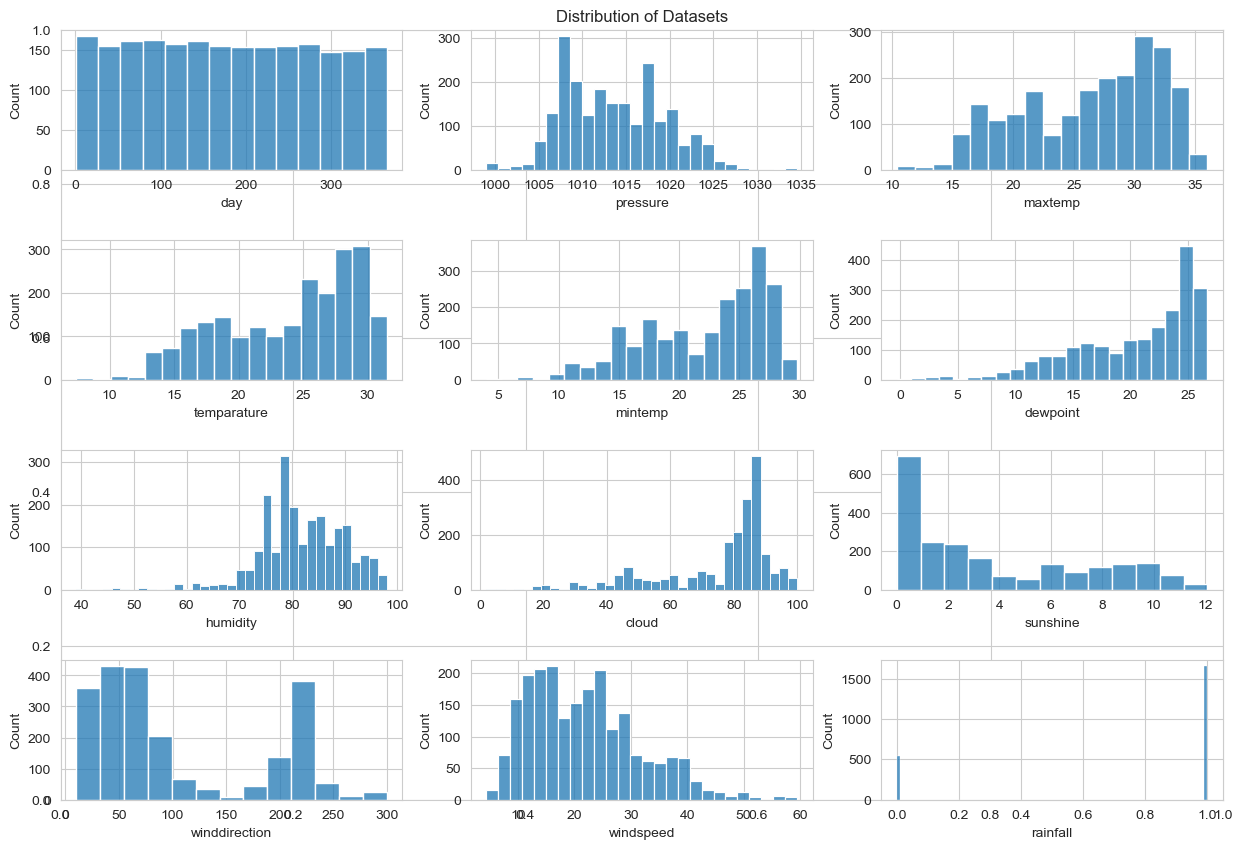

In [23]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

plt.title('Distribution of Datasets')
for i, col in enumerate(numeric_cols):
    plt.subplot(4,3,i+1)
    sns.histplot(df[col])


plt.show()

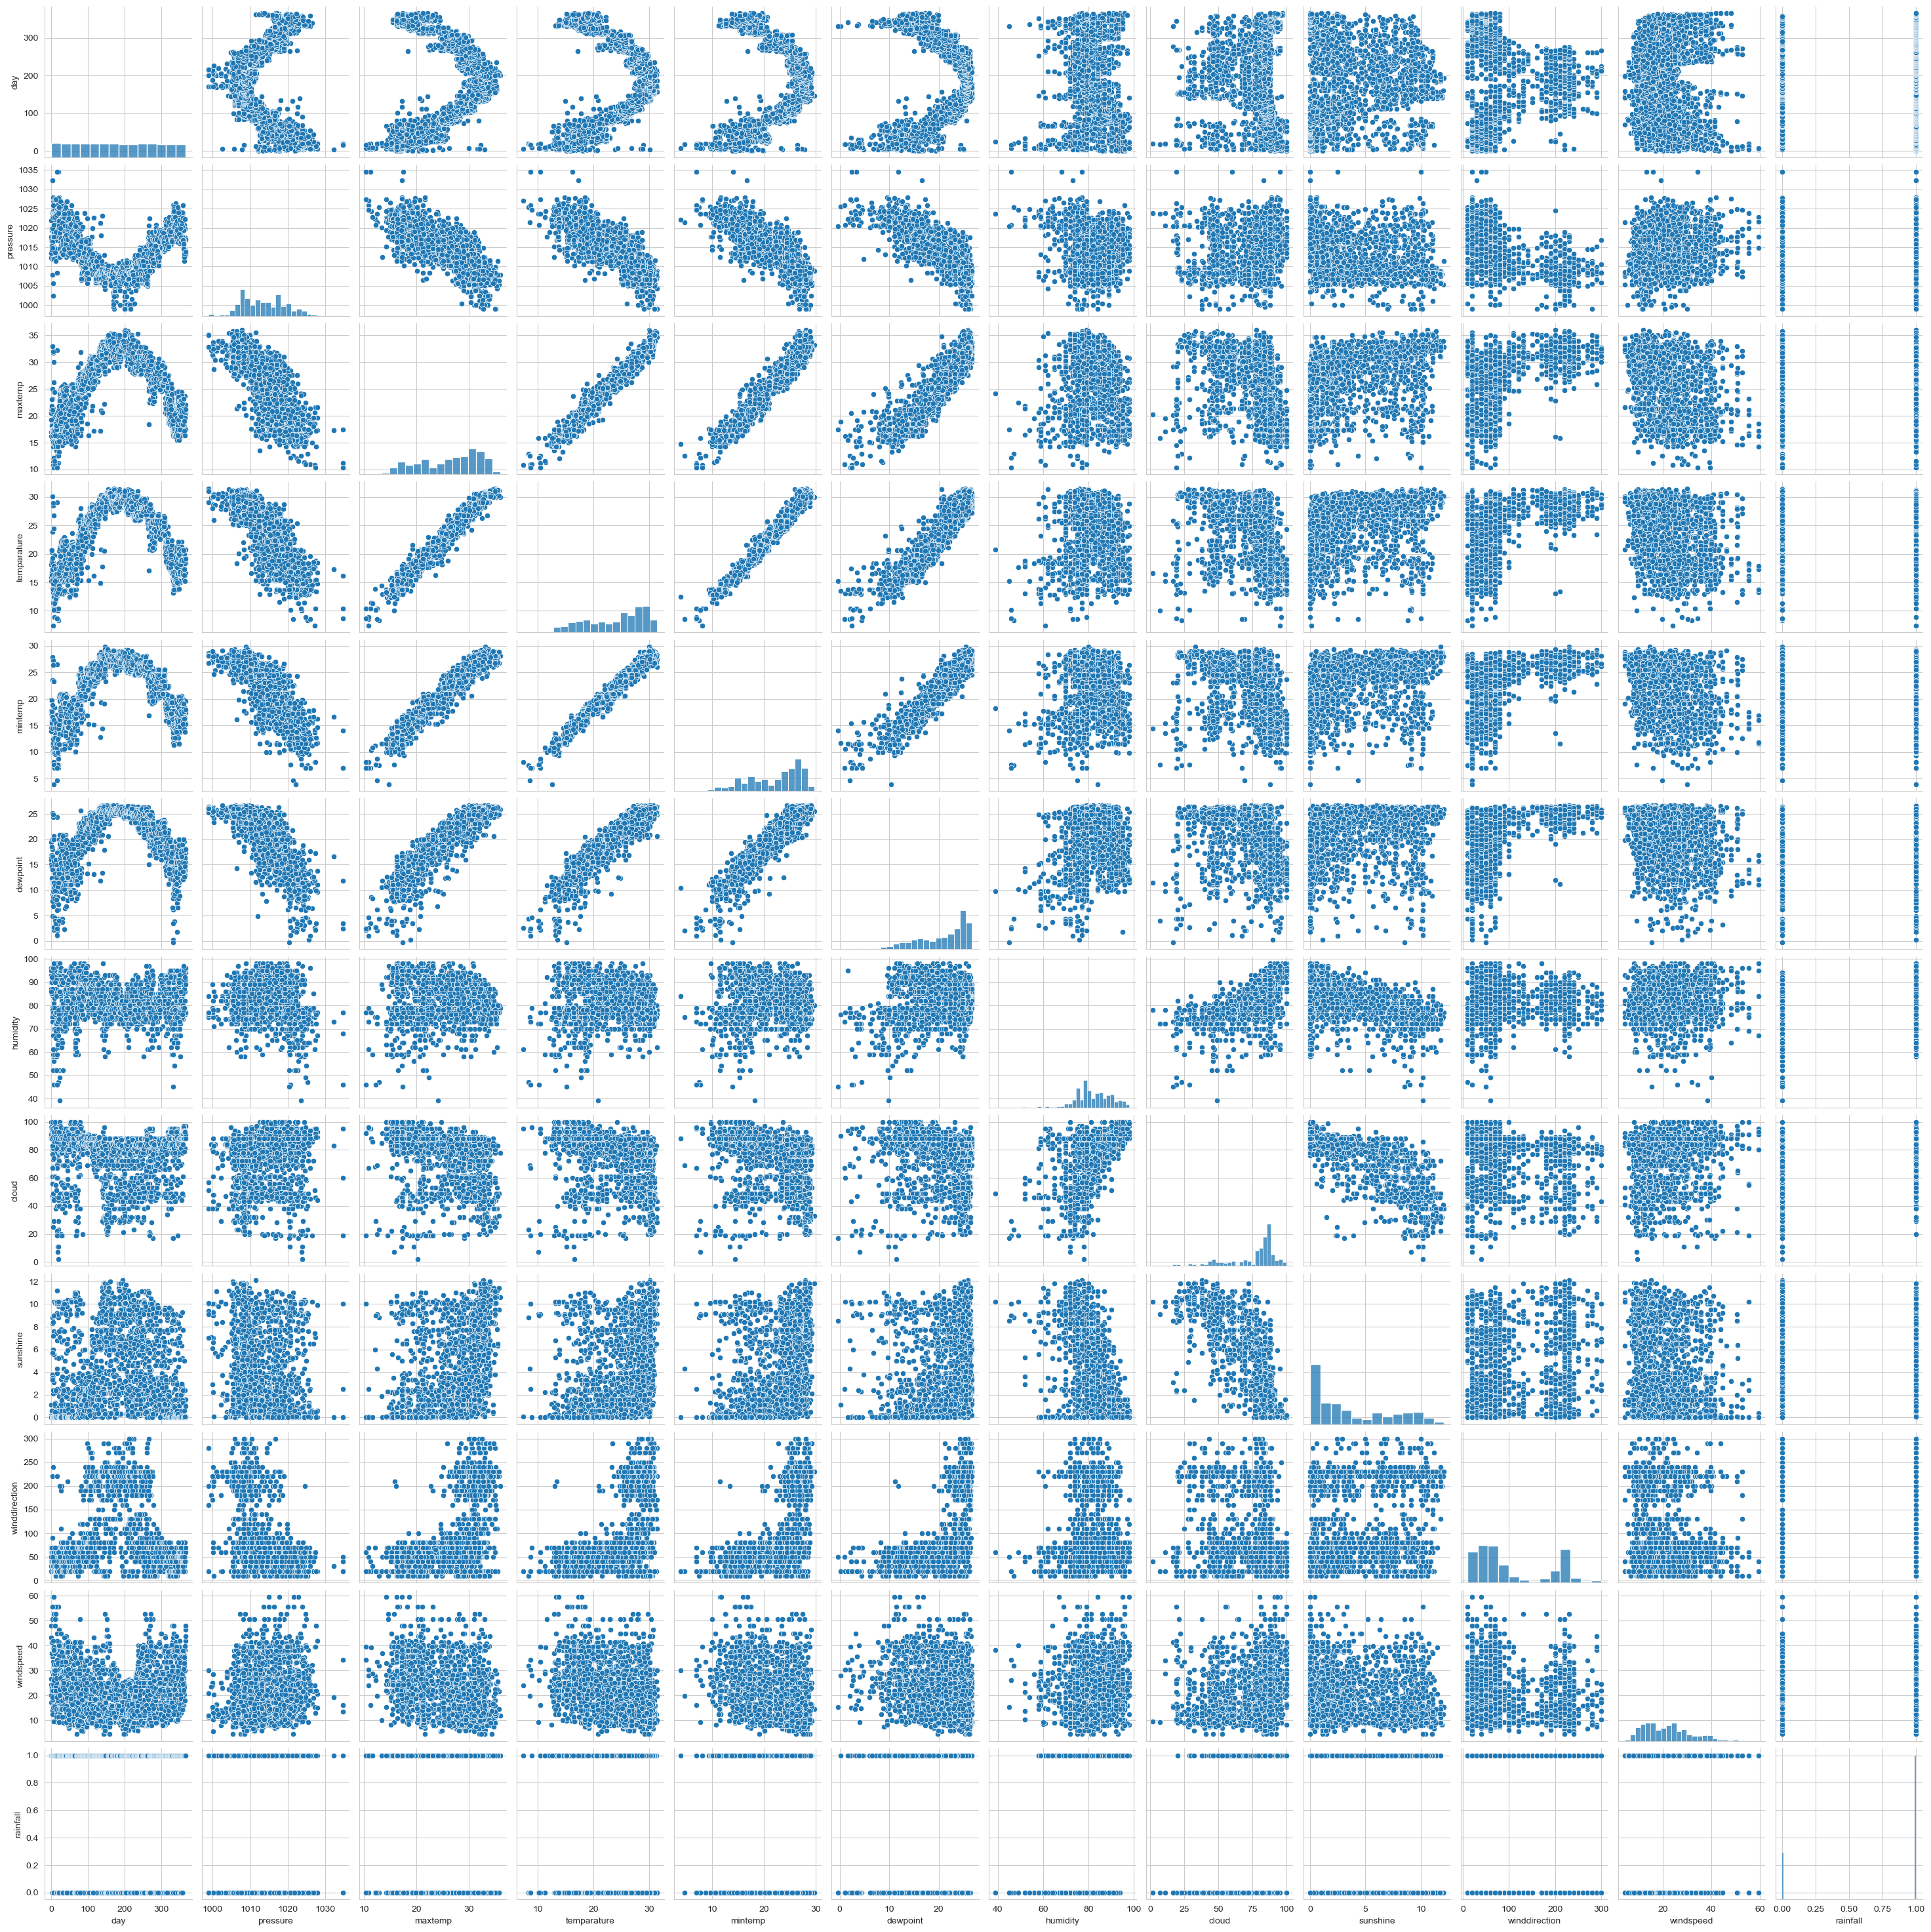

In [32]:
sns.pairplot(df[numeric_cols])

<Axes: >

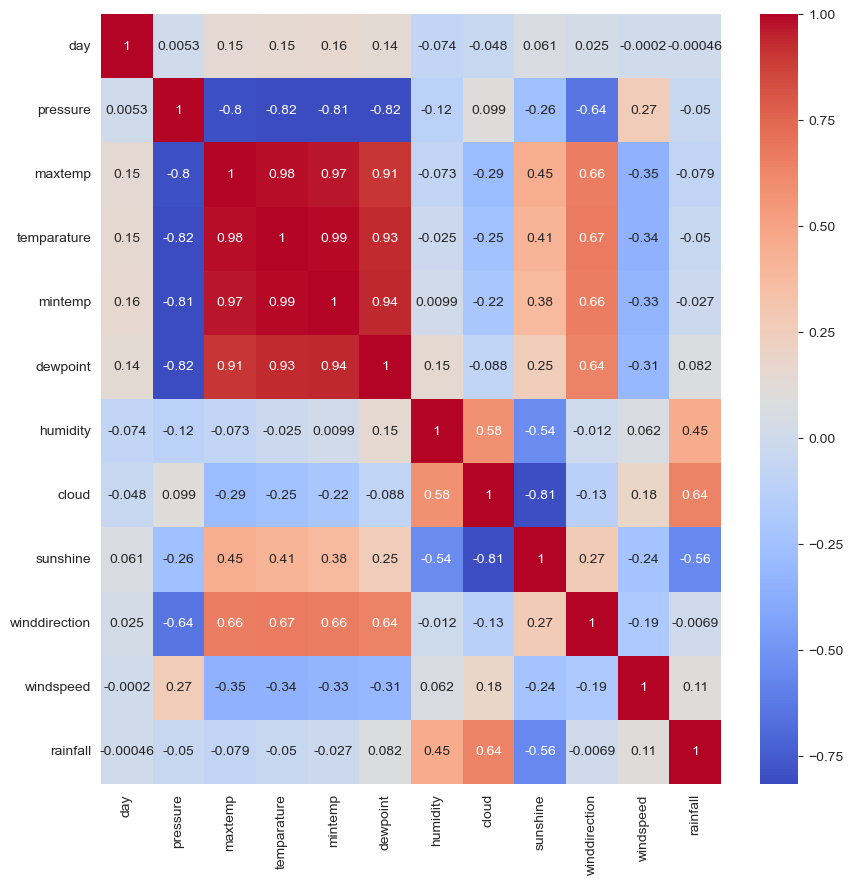

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')

In [33]:
print(df[numeric_cols].corr())

                    day  pressure   maxtemp  temparature   mintemp  dewpoint  \
day            1.000000  0.005337  0.146294     0.153590  0.161475  0.137929   
pressure       0.005337  1.000000 -0.800499    -0.816531 -0.814453 -0.817008   
maxtemp        0.146294 -0.800499  1.000000     0.982932  0.965529  0.906703   
temparature    0.153590 -0.816531  0.982932     1.000000  0.987150  0.933617   
mintemp        0.161475 -0.814453  0.965529     0.987150  1.000000  0.941342   
dewpoint       0.137929 -0.817008  0.906703     0.933617  0.941342  1.000000   
humidity      -0.074048 -0.119949 -0.072615    -0.025016  0.009891  0.153390   
cloud         -0.048175  0.098600 -0.289047    -0.249355 -0.219399 -0.088446   
sunshine       0.060936 -0.257163  0.452387     0.414019  0.379497  0.249676   
winddirection  0.024800 -0.643293  0.662235     0.668963  0.663828  0.643073   
windspeed     -0.000199  0.266012 -0.354168    -0.342262 -0.328871 -0.312179   
rainfall      -0.000462 -0.049886 -0.079

In [38]:
print(df['rainfall'].value_counts())

rainfall
1    1650
0     540
Name: count, dtype: int64


In [39]:
df.isna().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64